# LAB3 - Newton method principles

https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

## Exercise 1:

$$ f(x)=100x_1^2 +x_2^2$$

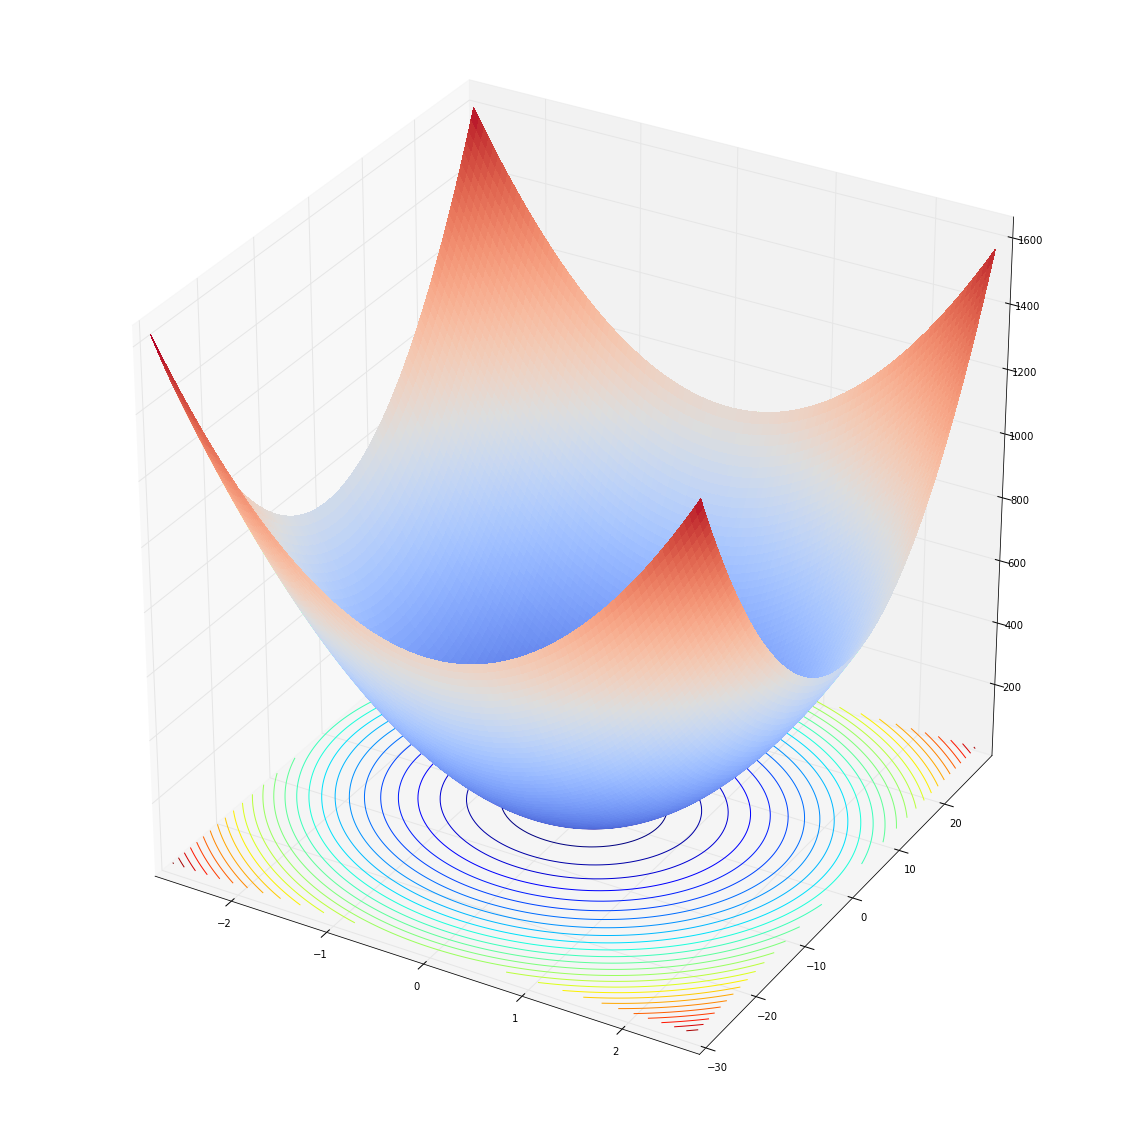

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
%matplotlib inline


# Function to analyze, and Computing gradient 

X = np.arange(-2.7, 2.7, 0.05)
Y = np.arange(-30, 30, 0.5)
X, Y = np.meshgrid(X, Y)
Z = 100*X**2 + Y**2 

gradx = 200 * X
grady = 2 * Y 

gradxx = 200
gradxy = gradyx = 0
gradyy = 2


# Defining functions

def f(X,Y):
    return 100*X**2 + Y**2 
def df_X(X):
    return 200*X
def df_Y(Y):
    return 2*Y

def hessian (X,Y): 
    DD_XX = 200
    DD_YY = 2
    DD_XY, DD_YX = 0, 0
    H = np.array([[DD_XX, DD_XY], [DD_YX, DD_YY]])
    return H

def det (H):
    return H[0][0]*H[1][1]-H[0][1]-H[1][0]

# Surface plot 3D + contour plot
fig = plt.figure(figsize=(20,20))
 
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.contour(X,Y,Z,30,zdir='z',offset=0)

plt.contour(X,Y,Z,100)

plt.show()

In [16]:
print X

[[-2.7  -2.65 -2.6  ...,  2.55  2.6   2.65]
 [-2.7  -2.65 -2.6  ...,  2.55  2.6   2.65]
 [-2.7  -2.65 -2.6  ...,  2.55  2.6   2.65]
 ..., 
 [-2.7  -2.65 -2.6  ...,  2.55  2.6   2.65]
 [-2.7  -2.65 -2.6  ...,  2.55  2.6   2.65]
 [-2.7  -2.65 -2.6  ...,  2.55  2.6   2.65]]


## 1. A simple quadratic function

### 1.1 gradient descent algorithm

iter= 1767 alpha= 0.015625


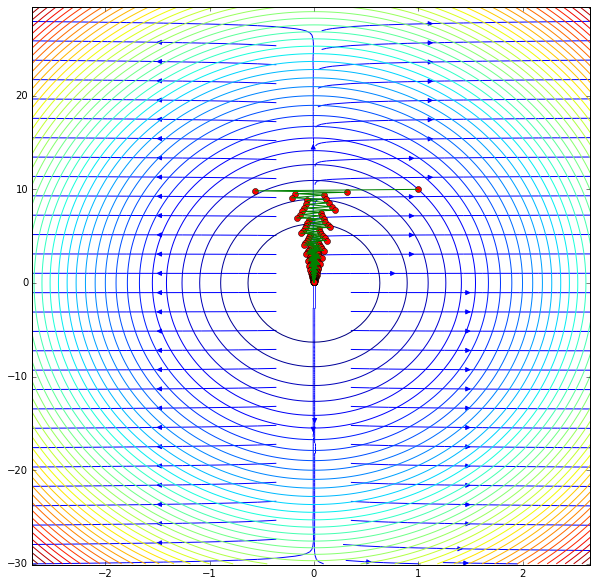

In [17]:
%matplotlib inline

# Contour plot en 2D
plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, 50)
plt.streamplot(X, Y, gradx, grady)

# gradient descent using the backtracking algorithm

alpha = 1  # step
pt = [1,10]   # initial point

listax = [pt[0]]
listay = [pt[1]]

iter = 0  
while alpha > 10**(-5) and abs(f(pt[0]- alpha * df_X(pt[0]), pt[1]- alpha * df_Y(pt[1]))-f(pt[0],pt[1]))>10**(-5):  
    iter +=1
    
    if f(pt[0]- alpha * df_X(pt[0]), pt[1]- alpha * df_Y(pt[1]))> f(pt[0],pt[1]):
        alpha = alpha/2.
    else: 
        plt.plot(pt[0],pt[1],'ro')
        pt[0] += -alpha * df_X(pt[0])
        pt[1] += -alpha * df_Y(pt[1])
        alpha = 1

        listax.append(pt[0])
        listay.append(pt[1])

print "iter=", iter, "alpha=", alpha
plt.plot(listax,listay)
plt.show()

### 1.2. Newton method 

In a general case, an unconstrained minimization algorithm uses the next algorithm:
$$ x_{k+1} =x_k + α_k d_k $$

where $d_k$ is a descent direction. For the Newton method the descent direction $d_k$ is the solution of
$$ ∇^2f(x^k)d^k =−∇f(x^k)$$

<b> The geometric interpretation of Newton's method </b> is that at each iteration one approximates f(x) by a quadratic function around $x_k$, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.


iter= 1014 alpha= 0.0078125


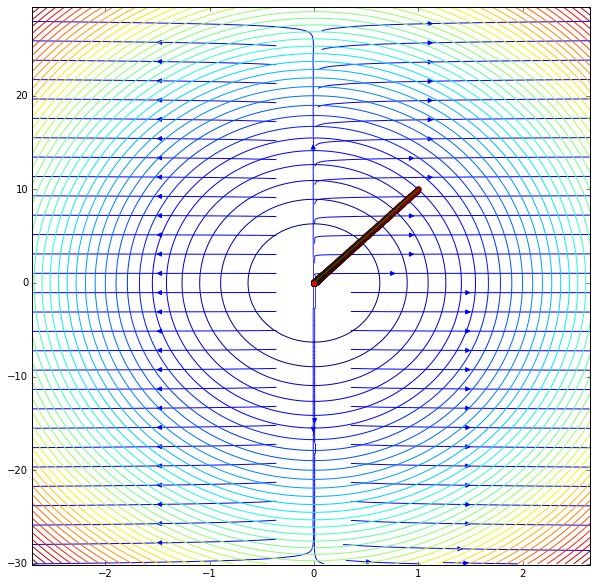

In [18]:
%matplotlib inline

# Contour plot en 2D
plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, 50)
plt.streamplot(X, Y, gradx, grady)

# gradient descent using the backtracking algorithm

alpha = 1  # step
pt = [1,10]   # initial point

listax = [pt[0]]
listay = [pt[1]]

iter = 0
while alpha > 10**(-5) and abs(f(pt[0]-alpha*df_X(pt[0]), pt[1]-alpha*df_Y(pt[1]))-f(pt[0],pt[1]))>10**(-5):   
    iter +=1
    if f(pt[0]- alpha * df_X(pt[0]), pt[1]- alpha * df_Y(pt[1]))> f(pt[0],pt[1]):
        alpha = alpha/2.

    else: 
        plt.plot(pt[0],pt[1],'ro')
        invH=inv(hessian(pt[0], pt[1]))
        direction = np.dot(invH, [df_X(pt[0]),df_Y(pt[1])])
        
        #print "invH", invH, [df_X(pt[0]),df_Y(pt[1])]
        #print "dire" , direction
        
        pt[0] += -alpha * direction[0]
        pt[1] += -alpha * direction[1]
        
        listax.append(pt[0])
        listay.append(pt[1])
        
print "iter=", iter, "alpha=",alpha
plt.plot(listax,listay)
plt.show()

Note that with the same initial point, the newton method reaches the minimum with less iterations. 